### Data preprocessing and .csv file creation

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# 100 most used n_grams per decade 

Generating count of unigrams, bigrams and trigrams per decade. We are using NLTK english stopwords here.

In [2]:
stopWords = stopwords.words('english')
stopWords = set(stopWords + ['dont', 'im', 'youre', 'ill'])
df = pd.read_csv('../data/billboard-spotify.csv')
L = []
L_tf = []
for i in np.arange(6):
    df_decade = df[df['year'].isin(list(np.arange(1960+10*i,1970+10*i)))]
    uni = CountVectorizer(token_pattern = '(?u)\\b\\w+\\b',stop_words=stopWords)
    bi = CountVectorizer(ngram_range=(2,2), token_pattern = '(?u)\\b\\w+\\b',stop_words=stopWords)
    tri = CountVectorizer(ngram_range=(3,3), token_pattern = '(?u)\\b\\w+\\b',stop_words=stopWords)
    uni_tf = uni.fit_transform(df_decade[df_decade.lyrics.isnull() == False]['lyrics'])
    bi_tf = bi.fit_transform(df_decade[df_decade.lyrics.isnull() == False]['lyrics'])
    tri_tf = tri.fit_transform(df_decade[df_decade.lyrics.isnull() == False]['lyrics'])
    uni_voc = uni.vocabulary_
    bi_voc = bi.vocabulary_
    tri_voc = tri.vocabulary_
    L_tf.append([uni_tf, bi_tf, tri_tf])
    L.append([uni_voc, bi_voc, tri_voc])

In [3]:
gram = ['unigram', 'bigram', 'trigram']
L_df = []
for k in np.arange(3):
    for i in np.arange(6):
        liste = L_tf[i][k].sum(axis=0).ravel().tolist()[0]
        liste_index = np.arange(len(liste))
        list1, list2 = (list(t) for t in zip(*sorted(zip(liste, liste_index), reverse=True)))
        list2 = list2[:100]
        for j in list2:
            for key, value in L[i][k].items():
                if value==j:
                    L_df.append([gram[k], 1960+10*i, key, list1[list2.index(j)]])

In [4]:
df_topwords = pd.DataFrame(L_df, columns=["gram", "decade", "word", "count"])

In [5]:
df_topwords.to_csv("../data/Louis/n_gram.csv", index=False)

# Cover

Detect covers: We consider as a cover a song having the same title as a previous song, but with a different artist (in order to get rid of songs that are in the billboard for two consecutive years).

In [6]:
cover_song = df[df.duplicated(['song','artist']) == False].reset_index().groupby('song')['year'].apply(list).reset_index()

In [7]:
list_year = []
for i in np.arange(len(cover_song)):
    year = cover_song.iloc[i]['year']
    if len(year) >= 2:
        list_year.append(year[1:])
flat_list = [item for sublist in list_year for item in sublist]

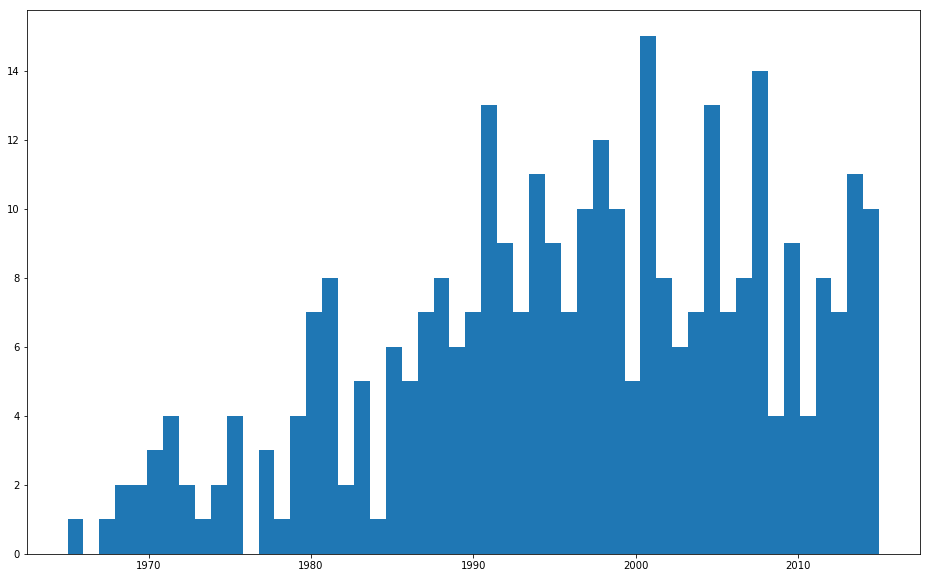

In [8]:
plt.figure(figsize=(16,10))
plt.hist(flat_list, bins=51)
plt.show()

In [9]:
df_cover = pd.DataFrame(flat_list, columns=["year"])
df_cover.to_csv("../data/Louis/cover_year.csv", index=False)

# Evolution of word usage over time

In [10]:
df_tidy = pd.read_csv('../data/tidy-words.csv.zip', encoding='latin1', compression='zip')
mask = df_tidy['word'].apply(lambda x: x not in list(stopWords))
word_count = df_tidy.loc[mask,:].groupby(['year','word'])['count'].sum().reset_index()
word_count.to_csv('../data/Louis/word_count_per_year.csv', index=False)